<h2> Assignment 5 Notebook </h2> 
<body>
<p>Full name : </p>
<p>Wisc Id : </p>
<p>Test Setup details : </p>
<p>Jupyter verison : </p>
</body>

In [48]:
import pandas as pd
# numpy has a lots of useful math related modules 
import numpy as np
# Helpful function to display intermittent result 
from IPython.display import display


<H4>Step 0 : Take a peek at the dataset</H4>

In [49]:
# Load the data and display only first five rows 
# NOTE replace the following value with the actual path to the csv file 
data_file = "<path_to_the_csv_file>" # e.g ~/cs564/p5/AQI.csv"
display(pd.read_csv(data_file, nrows=5).head())

,State Code,County Code,Latitude,Longitude,Date Local,AQI,Address,State Name,County Name,City Name,CBSA Name
0,55,59,42.504722,-87.8093,1997-04-28,82,"CHIWAUKEE PRAIRIE, 11838 FIRST COURT",Wisconsin,Kenosha,Pleasant Prairie,"Chicago-Naperville-Elgin, IL-IN-WI"
1,55,59,42.504722,-87.8093,1997-05-10,33,"CHIWAUKEE PRAIRIE, 11838 FIRST COURT",Wisconsin,Kenosha,Pleasant Prairie,"Chicago-Naperville-Elgin, IL-IN-WI"
2,55,59,42.504722,-87.8093,1997-05-16,25,"CHIWAUKEE PRAIRIE, 11838 FIRST COURT",Wisconsin,Kenosha,Pleasant Prairie,"Chicago-Naperville-Elgin, IL-IN-WI"
3,55,59,42.504722,-87.8093,1997-05-22,25,"CHIWAUKEE PRAIRIE, 11838 FIRST COURT",Wisconsin,Kenosha,Pleasant Prairie,"Chicago-Naperville-Elgin, IL-IN-WI"
4,55,59,42.504722,-87.8093,1997-05-28,46,"CHIWAUKEE PRAIRIE, 11838 FIRST COURT",Wisconsin,Kenosha,Pleasant Prairie,"Chicago-Naperville-Elgin, IL-IN-WI"


<H5>Step 1 : Load the dataset</H5>


In [50]:
from sqlalchemy import create_engine
import sqlite3
# create a database where we'll load the dataset from the csv file 
db_conn = create_engine('sqlite:///AirQualityIndex.db')

In [ ]:
import string
# load in a batch of 5000 tuples. Modify this value to your needs
chunks = 5000
for data in pd.read_csv(data_file, chunksize=chunks,
 iterator=True, encoding='utf-8'):

 data = data.rename(columns={col: col.replace('-', ' ') for col in data.columns})
 data = data.rename(columns={col: col.strip() for col in data.columns})
 data = data.rename(columns={col: string.capwords(col) for col in data.columns})
 data = data.rename(columns={col: col.replace(' ', '') for col in data.columns})

 data.to_sql('data', db_conn, if_exists='append')

<H5>Step 2 : Data Exploration</H5>
<body>
<p> Find the average air quality index for each city recorded during the year 1997 </p>
</body>

In [35]:
avg_air_quality = pd.read_sql_query("""SELECT AVG(AQI) as avg_aqi, 
                             CityName as city FROM data
                             WHERE "DateLocal" LIKE "1997-%" 
                             GROUP BY city 
                             ORDER BY avg_aqi DESC""", db_conn)

# Display the result (Note - the result 'avg_air_quality' is an instance of 'pandas DataFrame')
display(avg_air_quality)


,avg_aqi,city
0,58.068182,Milwaukee
1,54.279070,Waukesha
2,50.731707,Pleasant Prairie


<H5>Step 3 : Data Visualization</H5>
<body>
<p>Visualize the data you received above as plots</p>
</body>

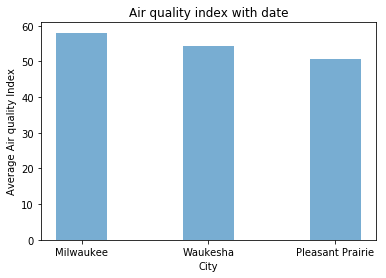

In [44]:
# Use matplotlib library to plot graph - a simple barchart in this case 
# We encourage you to explore different and more complex types of chart
import matplotlib.pyplot as plt


# First we convert the Dataframe object to Python list (that Matplotlib understands)
from pandas import DataFrame
# this is our 'y-axis' value - obtained by flattening the DataFrame object 
aqis_list = list(avg_air_quality['avg_aqi'].values.flatten())
# This is our x-axis value 
cities = list(avg_air_quality['city'].values.flatten())

# Specify the plot type and formatting 
plt.title('Air quality index with date')
y_pos = np.arange(len(cities))
# Type of graph
plt.bar(y_pos, aqis_list, align='center', alpha=0.6, width=0.4)
# Specify 'ticks' on the x-axis for each item in the list for 'x-axis' values  
plt.xticks(y_pos, cities)
plt.xlabel('City')
plt.ylabel('Average Air quality Index')
plt.show()
# Save this diagram(by default at the directory from where this application is launched)
plt.savefig("figA.png")


<h5> Step 4 : Optional (recommended) : Build Machine Learning models </h5>

<H4>Summary </H4>
<body>
<p>1. Write a brief summary of your findings here. </p>
<p>2. Additionally explore by building a machine learning model using scikit-learn to make predictions and analysis </p>
</body>

<h5> Finally, take a moment to reflect on what we achieved here - we started with a raw dataset, processed them, built models and ran analytics to finally gain insights from the data :) </h5> 